/tmp/ipython-input-2-2797292010.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288582  24.757336  23.848707  24.746228  212818400
2015-01-05  23.604336  24.137516  23.417723  24.057539  257142000
2015-01-06  23.606556  23.866481  23.244437  23.668760  263188400
2015-01-07  23.937574  24.037545  23.704307  23.815387  160423600
2015-01-08  24.857306  24.915067  24.148620  24.266365  237458000


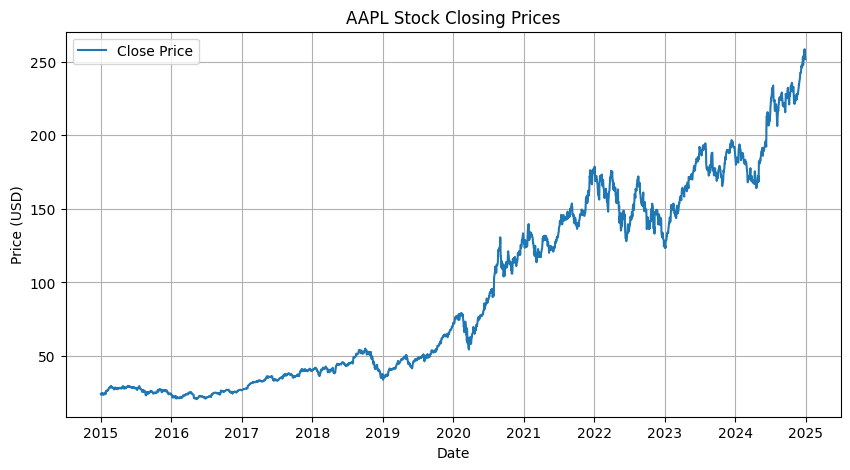

In [ ]:
# Install if not already installed
# pip install yfinance pandas matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

# View first few rows
print(data.head())

# Save to CSV (optional)
data.to_csv(f"{ticker}_stock_data.csv")

# Plot the Close price
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.title(f"{ticker} Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
data.to_csv("AAPL_stock_data.csv", index_label="Date")




 ### EDA

In [ ]:
import pandas as pd

# Load your CSV (replace 'AAPL_stock_data.csv' with your filename)
df = pd.read_csv("/content/AAPL_stock_data.csv", index_col=0, parse_dates=True)
df.head()



/tmp/ipython-input-4-624617991.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/AAPL_stock_data.csv", index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN
2015-01-02,24.28858184814453,24.75733627662568,23.84870740573121,24.74622767701957,212818400
2015-01-05,23.60433578491211,24.137516414569966,23.417723496745833,24.057539235374563,257142000
2015-01-06,23.606555938720703,23.866480902659614,23.244436602442416,23.66876002975555,263188400


In [ ]:
print(df.isnull().sum())


Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [ ]:
print(df.isnull().sum())


Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [ ]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-7-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.isnull().sum())


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


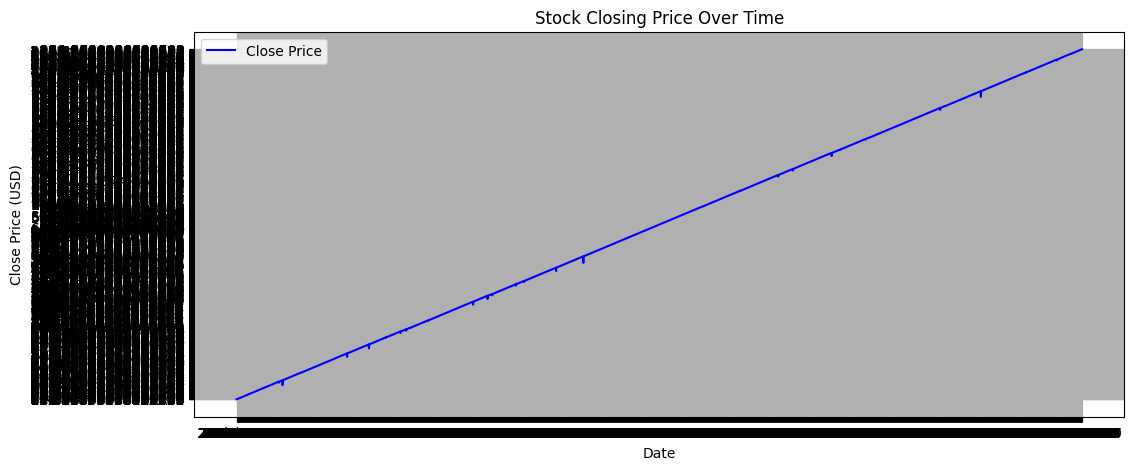

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df.dtypes)



Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [ ]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


<Axes: title={'center': 'Moving Averages'}, xlabel='Price'>

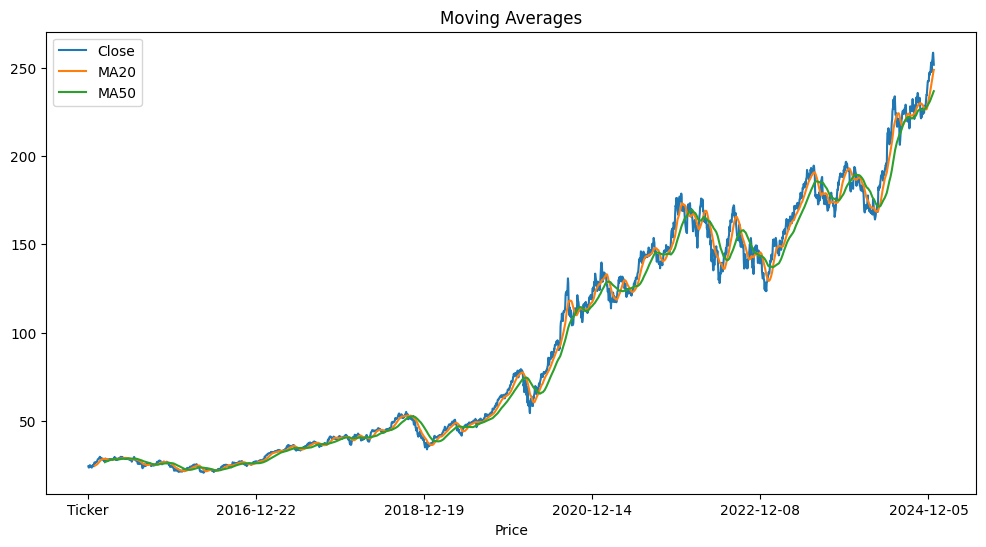

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

df[['Close', 'MA20', 'MA50']].plot(figsize=(12,6), title="Moving Averages")


<Axes: title={'center': 'Daily Return'}, xlabel='Price'>

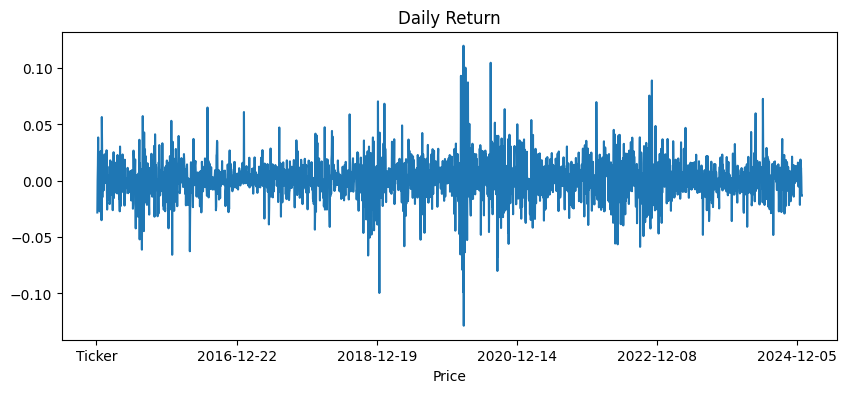

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

df['Daily Return'].plot(figsize=(10,4), title="Daily Return")


Text(0, 0.5, 'Frequency')

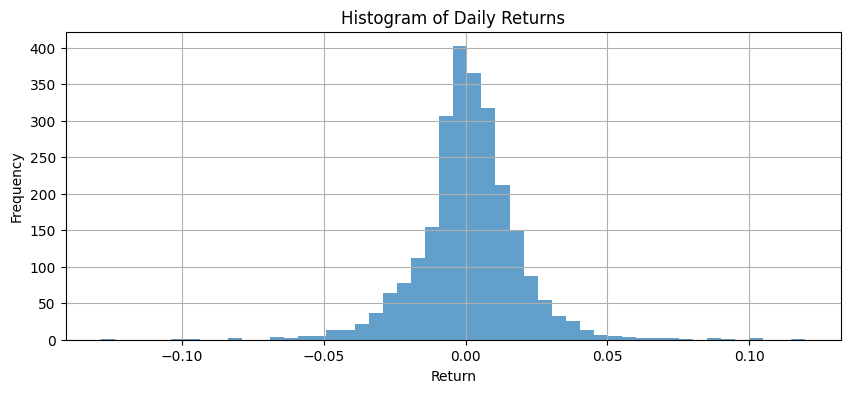

In [ ]:
df['Daily Return'].hist(bins=50, figsize=(10,4), alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")


In [ ]:
print(df.head())


                Close                High                 Low  \
Price                                                           
Ticker            NaN                AAPL                AAPL   
Date              NaN                AAPL                AAPL   
2015-01-02  24.288582   24.75733627662568   23.84870740573121   
2015-01-05  23.604336  24.137516414569966  23.417723496745833   
2015-01-06  23.606556  23.866480902659614  23.244436602442416   

                          Open     Volume  MA20  MA50  Daily Return  
Price                                                                
Ticker                    AAPL       AAPL   NaN   NaN           NaN  
Date                      AAPL       AAPL   NaN   NaN           NaN  
2015-01-02   24.74622767701957  212818400   NaN   NaN           NaN  
2015-01-05  24.057539235374563  257142000   NaN   NaN     -0.028172  
2015-01-06   23.66876002975555  263188400   NaN   NaN      0.000094  


In [ ]:
# Name the index before saving
df.index.name = 'Date'

# Save to CSV
df.to_csv("AAPL_cleaned.csv")

# Read back using index_col='Date'
df_check = pd.read_csv("AAPL_cleaned.csv", index_col='Date', parse_dates=True)

print(df_check.head())



                Close                High                 Low  \
Date                                                            
Ticker            NaN                AAPL                AAPL   
Date              NaN                AAPL                AAPL   
2015-01-02  24.288582   24.75733627662568   23.84870740573121   
2015-01-05  23.604336  24.137516414569966  23.417723496745833   
2015-01-06  23.606556  23.866480902659614  23.244436602442416   

                          Open     Volume  MA20  MA50  Daily Return  
Date                                                                 
Ticker                    AAPL       AAPL   NaN   NaN           NaN  
Date                      AAPL       AAPL   NaN   NaN           NaN  
2015-01-02   24.74622767701957  212818400   NaN   NaN           NaN  
2015-01-05  24.057539235374563  257142000   NaN   NaN     -0.028172  
2015-01-06   23.66876002975555  263188400   NaN   NaN      0.000094  


/tmp/ipython-input-16-2732060347.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_check = pd.read_csv("AAPL_cleaned.csv", index_col='Date', parse_dates=True)


### Time Series Decomposition

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Use the 'Close' price
result = adfuller(df['Close'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print("✅ The series is likely stationary.")
else:
    print("❌ The series is likely NOT stationary.")


ADF Statistic: 0.8448214636090525
p-value: 0.9923262798061881
❌ The series is likely NOT stationary.


In [ ]:
df['Close_diff'] = df['Close'].diff()
result_diff = adfuller(df['Close_diff'].dropna())

print("After differencing:")
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])


After differencing:
ADF Statistic: -16.17873386436562
p-value: 4.288642688416757e-29


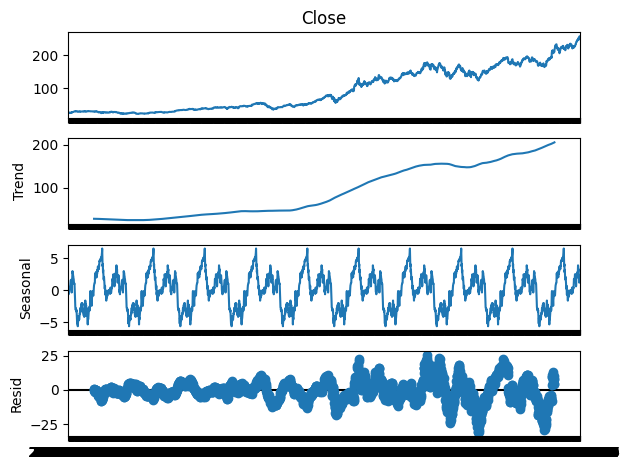

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Drop missing values
close = df['Close'].dropna()

# Decompose (use model='multiplicative' for data with growing seasonality)
decomposition = seasonal_decompose(close, model='additive', period=252)  # ~252 trading days in a year

# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()


## ARIMA

/tmp/ipython-input-22-3952032893.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_cleaned.csv", parse_dates=['Date'])
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting

✅ arima_forecast.csv has been created successfully!


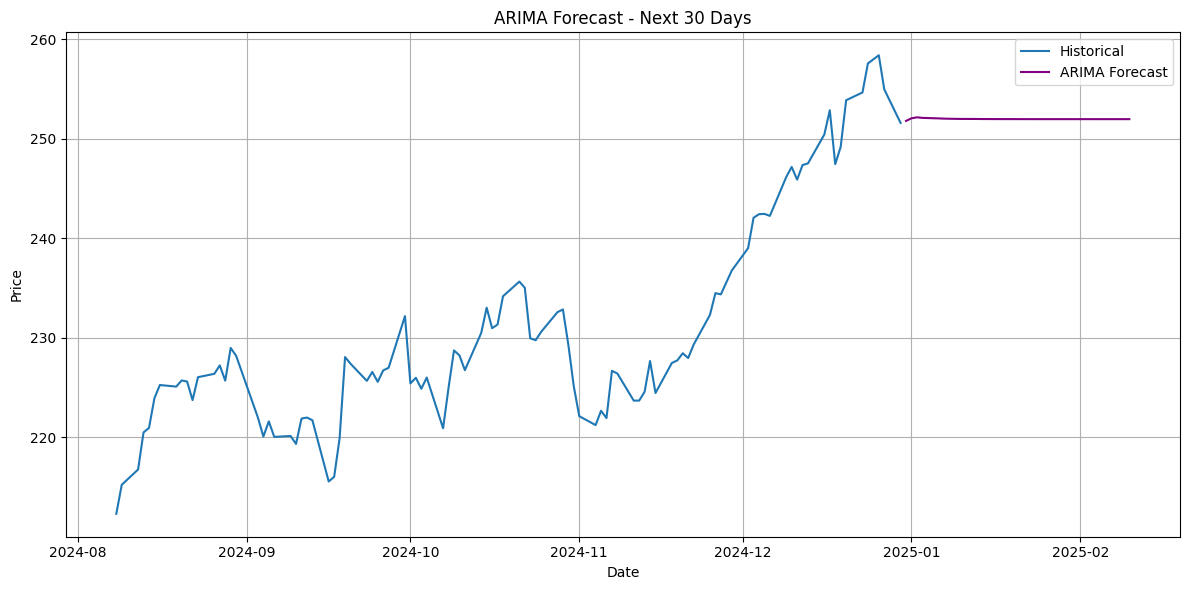

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the cleaned Apple stock data
df = pd.read_csv("AAPL_cleaned.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Use the 'Close' column
series = df['Close'].dropna()

# Ensure the series index is a DatetimeIndex
series.index = pd.to_datetime(series.index)

# Fit ARIMA model (order can be tuned via auto_arima if needed)
model = ARIMA(series, order=(5, 1, 2))
model_fit = model.fit()

# Forecast next 30 business days
forecast = model_fit.get_forecast(steps=30)
# Calculate the start date for the forecast by adding Timedelta to the last date in the series index
forecast_start_date = series.index[-1] + pd.Timedelta(days=1)
# Create the forecast index using the calculated start date and 'B' frequency for business days
forecast_index = pd.date_range(start=forecast_start_date, periods=30, freq='B')


# Create forecast DataFrame
arima_forecast = pd.DataFrame({
    'Date': forecast_index,
    'forecast': forecast.predicted_mean
})
arima_forecast.set_index('Date', inplace=True)

# Save to CSV
arima_forecast.to_csv("arima_forecast.csv")
print("✅ arima_forecast.csv has been created successfully!")

# Optional: Plot
plt.figure(figsize=(12, 6))
plt.plot(series[-100:], label='Historical')
plt.plot(arima_forecast, label='ARIMA Forecast', color='purple')
plt.title("ARIMA Forecast - Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-855819716.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_cleaned.csv", parse_dates=['Date'], index_col='Date')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `star

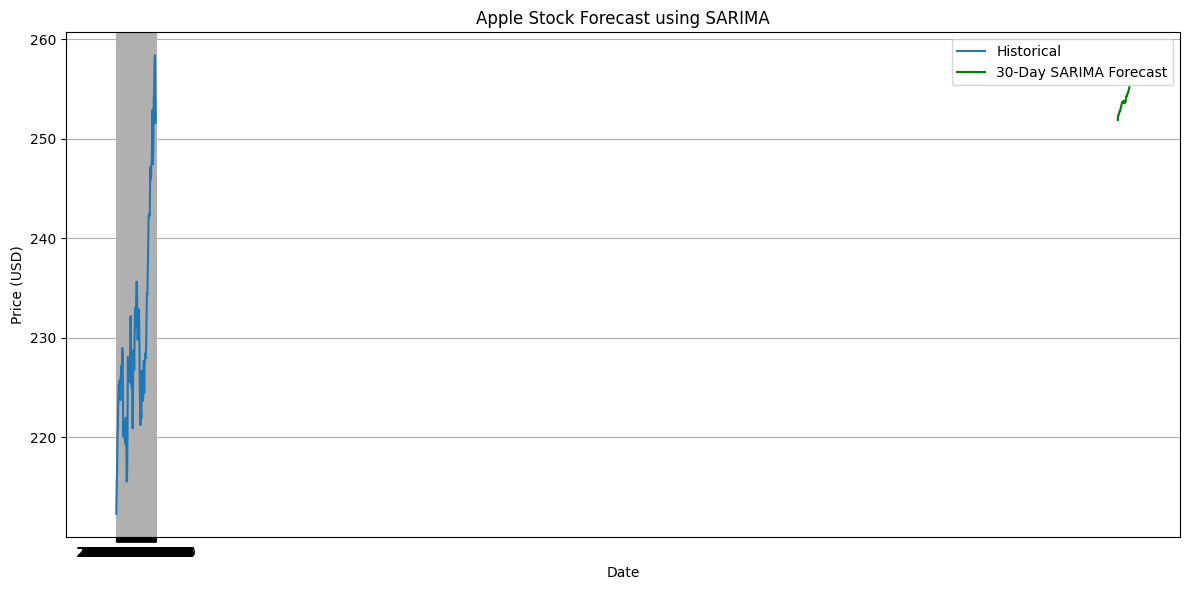

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load the cleaned Apple stock data
df = pd.read_csv("AAPL_cleaned.csv", parse_dates=['Date'], index_col='Date')

# Step 2: Use the 'Close' column for modeling
series = df['Close'].dropna()

# Step 3: Set SARIMA order (p,d,q) and seasonal_order (P,D,Q,s)
# These are common starting values:
order = (1, 1, 1)             # ARIMA order
seasonal_order = (1, 1, 1, 20)  # Seasonality: 252 for daily stock data (~252 trading days/year)

# Step 4: Fit the SARIMA model
model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Step 5: Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Step 6: Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(series[-100:], label='Historical')
plt.plot(forecast.index, forecast, label='30-Day SARIMA Forecast', color='green')
plt.title("Apple Stock Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the file with proper handling for index column
df = pd.read_csv("AAPL_cleaned.csv")

# Check for problems (print first few rows)
print(df.head())

# If the first column is an unnamed index column, drop it
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where Date is NaT (not a valid date)
df = df.dropna(subset=['Date'])

# Prepare for Prophet
prophet_df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
print(prophet_df.head())


         Date      Close                High                 Low  \
0      Ticker        NaN                AAPL                AAPL   
1        Date        NaN                AAPL                AAPL   
2  2015-01-02  24.288582   24.75733627662568   23.84870740573121   
3  2015-01-05  23.604336  24.137516414569966  23.417723496745833   
4  2015-01-06  23.606556  23.866480902659614  23.244436602442416   

                 Open     Volume  MA20  MA50  Daily Return  
0                AAPL       AAPL   NaN   NaN           NaN  
1                AAPL       AAPL   NaN   NaN           NaN  
2   24.74622767701957  212818400   NaN   NaN           NaN  
3  24.057539235374563  257142000   NaN   NaN     -0.028172  
4   23.66876002975555  263188400   NaN   NaN      0.000094  
          ds          y
2 2015-01-02  24.288582
3 2015-01-05  23.604336
4 2015-01-06  23.606556
5 2015-01-07  23.937574
6 2015-01-08  24.857306


/tmp/ipython-input-24-712919764.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9nss13a_/uisqju4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9nss13a_/rqf_t_qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46395', 'data', 'file=/tmp/tmp9nss13a_/uisqju4v.json', 'init=/tmp/tmp9nss13a_/rqf_t_qm.json', 'output', 'file=/tmp/tmp9nss13a_/prophet_modelt8va9xm8/prophet_model-20250619154121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


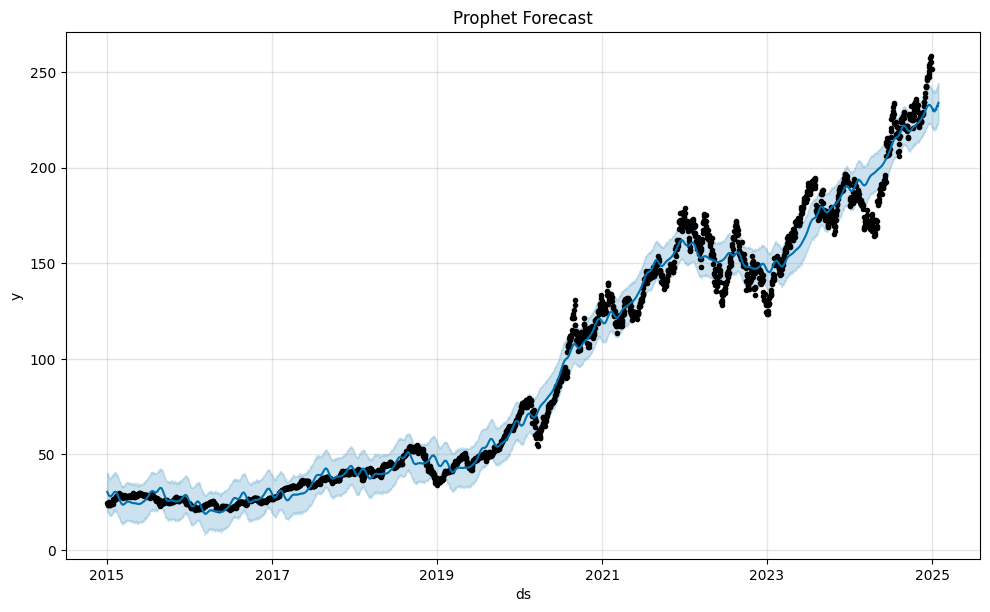

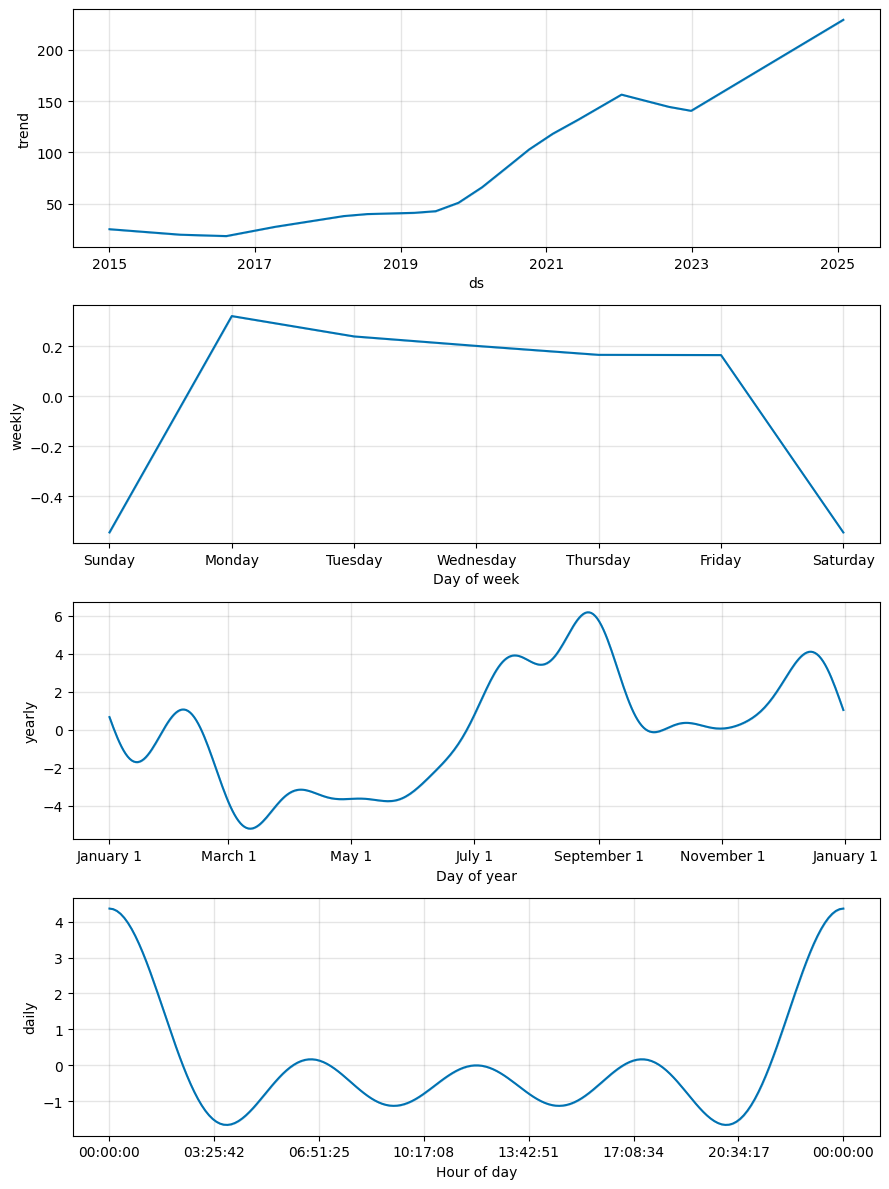

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

model.plot_components(forecast)
plt.tight_layout()
plt.show()
